In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

In [20]:
boston = datasets.load_boston()

In [21]:
print(boston.keys())
print(boston.DESCR)
print(boston.data.shape)
print(boston.feature_names)

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])
.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX

In [22]:
x = boston.data[:, np.newaxis, 5]
print(x.shape)

(506, 1)


In [23]:
y = boston.target
print(y.shape)

(506,)


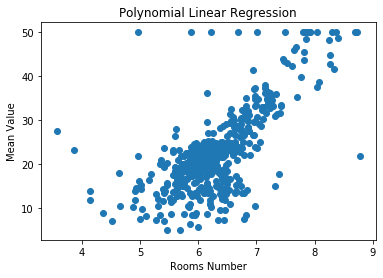

In [24]:
plt.scatter(x, y)
plt.title('Polynomial Linear Regression')
plt.xlabel('Rooms Number')
plt.ylabel('Mean Value')
plt.show()

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)
print(x_train[0])

(404, 1)
(404,)
(102, 1)
(102,)
[7.853]


In [26]:
poly = PolynomialFeatures(degree = 2)
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.fit_transform(x_test)
print(x_train_poly.shape)
print(x_test_poly.shape)
print(x_train_poly[0])

(404, 3)
(102, 3)
[ 1.        7.853    61.669609]


In [27]:
alg = linear_model.LinearRegression()
alg.fit(x_train_poly, y_train)
y_pred = alg.predict(x_test_poly)
print(y_pred.shape)

(102,)


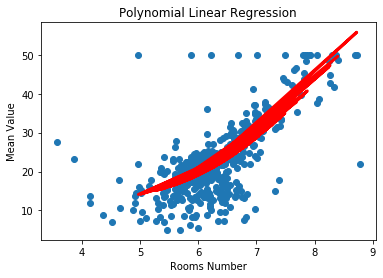

In [34]:
plt.scatter(x, y)
plt.plot(x_test, y_pred, color='red', linewidth=3)
plt.title('Polynomial Linear Regression')
plt.xlabel('Rooms Number')
plt.ylabel('Mean Value')
plt.show()

In [13]:
a0 = alg.intercept_
print('a0:', a0)
a = alg.coef_
print('ai:', a)
print('y =', a0 + a[0], '+', a[1], '* x +', a[2], '* x^2')

a0: 63.25405878859252
ai: [  0.         -21.52632451   2.36836008]
y = 63.25405878859252 + -21.526324509097048 * x + 2.3683600789916675 * x^2


In [14]:
print('certainty:', alg.score(x_train_poly, y_train) * 100, '%')

certainty: 57.549503600274306 %
